# CRS Canada immigration metrics analysis
We investigate the Comprehensive Ranking Systme (CRS) metrics that canada uses to grant permanent residence invitations and project predicted cutoff values for the incoming cohort.

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [460]:
url = 'https://www.canada.ca/content/dam/ircc/documents/json/ee_rounds_123_en.json'
r = requests.get(url)
rounds = r.json()['rounds']

## Creating the pandas dataframe
When we scrape the data from the website, we start with a json file saved in their system which is used to populate dynamic tables on their site.
To properly transform and rename the columns into readable/printable data, we need to adjust datatypes and others.

In [461]:
for r in rounds:
    for i in r:
        r[i] = r[i].replace(",", "")

In [462]:
df = pd.DataFrame.from_dict(rounds,dtype='string')
df= df.drop(columns=['drawNumberURL','mitext','DrawText1','drawDistributionAsOn','drawDateFull'])

In [463]:
{"CRS cutoff":"int64", "invitations issued":"int64","total applications":"int64","date": "datetime64[ns]"}
dtypes={#"drawNumber": "id", 
         "drawDate": "datetime64[ns]", 
         #"drawName": "round type", 
         "drawSize":"int64", 
         "drawCRS": "int64",
         #"drawText2": "type issued",
         #"drawCutOff": "tie break rule",
         "dd18": "int64",
         "dd1":  "int64",
         "dd2":  "int64",
         "dd3":  "int64",
         "dd4":  "int64",
         "dd5":  "int64",
         "dd6":  "int64",
         "dd7":  "int64",
         "dd8":  "int64",
         "dd9":  "int64",
         "dd10": "int64",
         "dd11": "int64",
         "dd12": "int64",
         "dd13": "int64",
         "dd14": "int64",
         "dd15": "int64",
         "dd16": "int64",
         "dd17": "int64",
         }

columns={"drawNumber": "id", 
         "drawDate": "date", 
         "drawName": "round type", 
         "drawSize":"invitations issued", 
         "drawCRS": "CRS cutoff",
         "drawText2": "type issued",
         "drawCutOff": "tie break rule",
         "dd18": "total applications",
         "dd1":  "crs_range_601_1200",
         "dd2":  "crs_range_501_600",
         "dd3":  "crs_range_451_500",
         "dd4":  "crs_range_491_500",
         "dd5":  "crs_range_481_490",
         "dd6":  "crs_range_471_480",
         "dd7":  "crs_range_461_470",
         "dd8":  "crs_range_451_460",
         "dd9":  "crs_range_401_450",
         "dd10": "crs_range_441_450",
         "dd11": "crs_range_431_440",
         "dd12": "crs_range_421_430",
         "dd13": "crs_range_411_420",
         "dd14": "crs_range_401_410",
         "dd15": "crs_range_351_400",
         "dd16": "crs_range_301_350",
         "dd17": "crs_range_000_300",
         }

df = df.astype(dtype=dtypes)
df = df.rename(columns=columns)


In [464]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  303 non-null    string        
 1   date                303 non-null    datetime64[ns]
 2   round type          303 non-null    string        
 3   invitations issued  303 non-null    int64         
 4   CRS cutoff          303 non-null    int64         
 5   type issued         303 non-null    string        
 6   drawDateTime        303 non-null    string        
 7   tie break rule      303 non-null    string        
 8   crs_range_601_1200  303 non-null    int64         
 9   crs_range_501_600   303 non-null    int64         
 10  crs_range_451_500   303 non-null    int64         
 11  crs_range_491_500   303 non-null    int64         
 12  crs_range_481_490   303 non-null    int64         
 13  crs_range_471_480   303 non-null    int64         

## Exploring the data
### We plot /summarize the data by round type and explore its behavior.

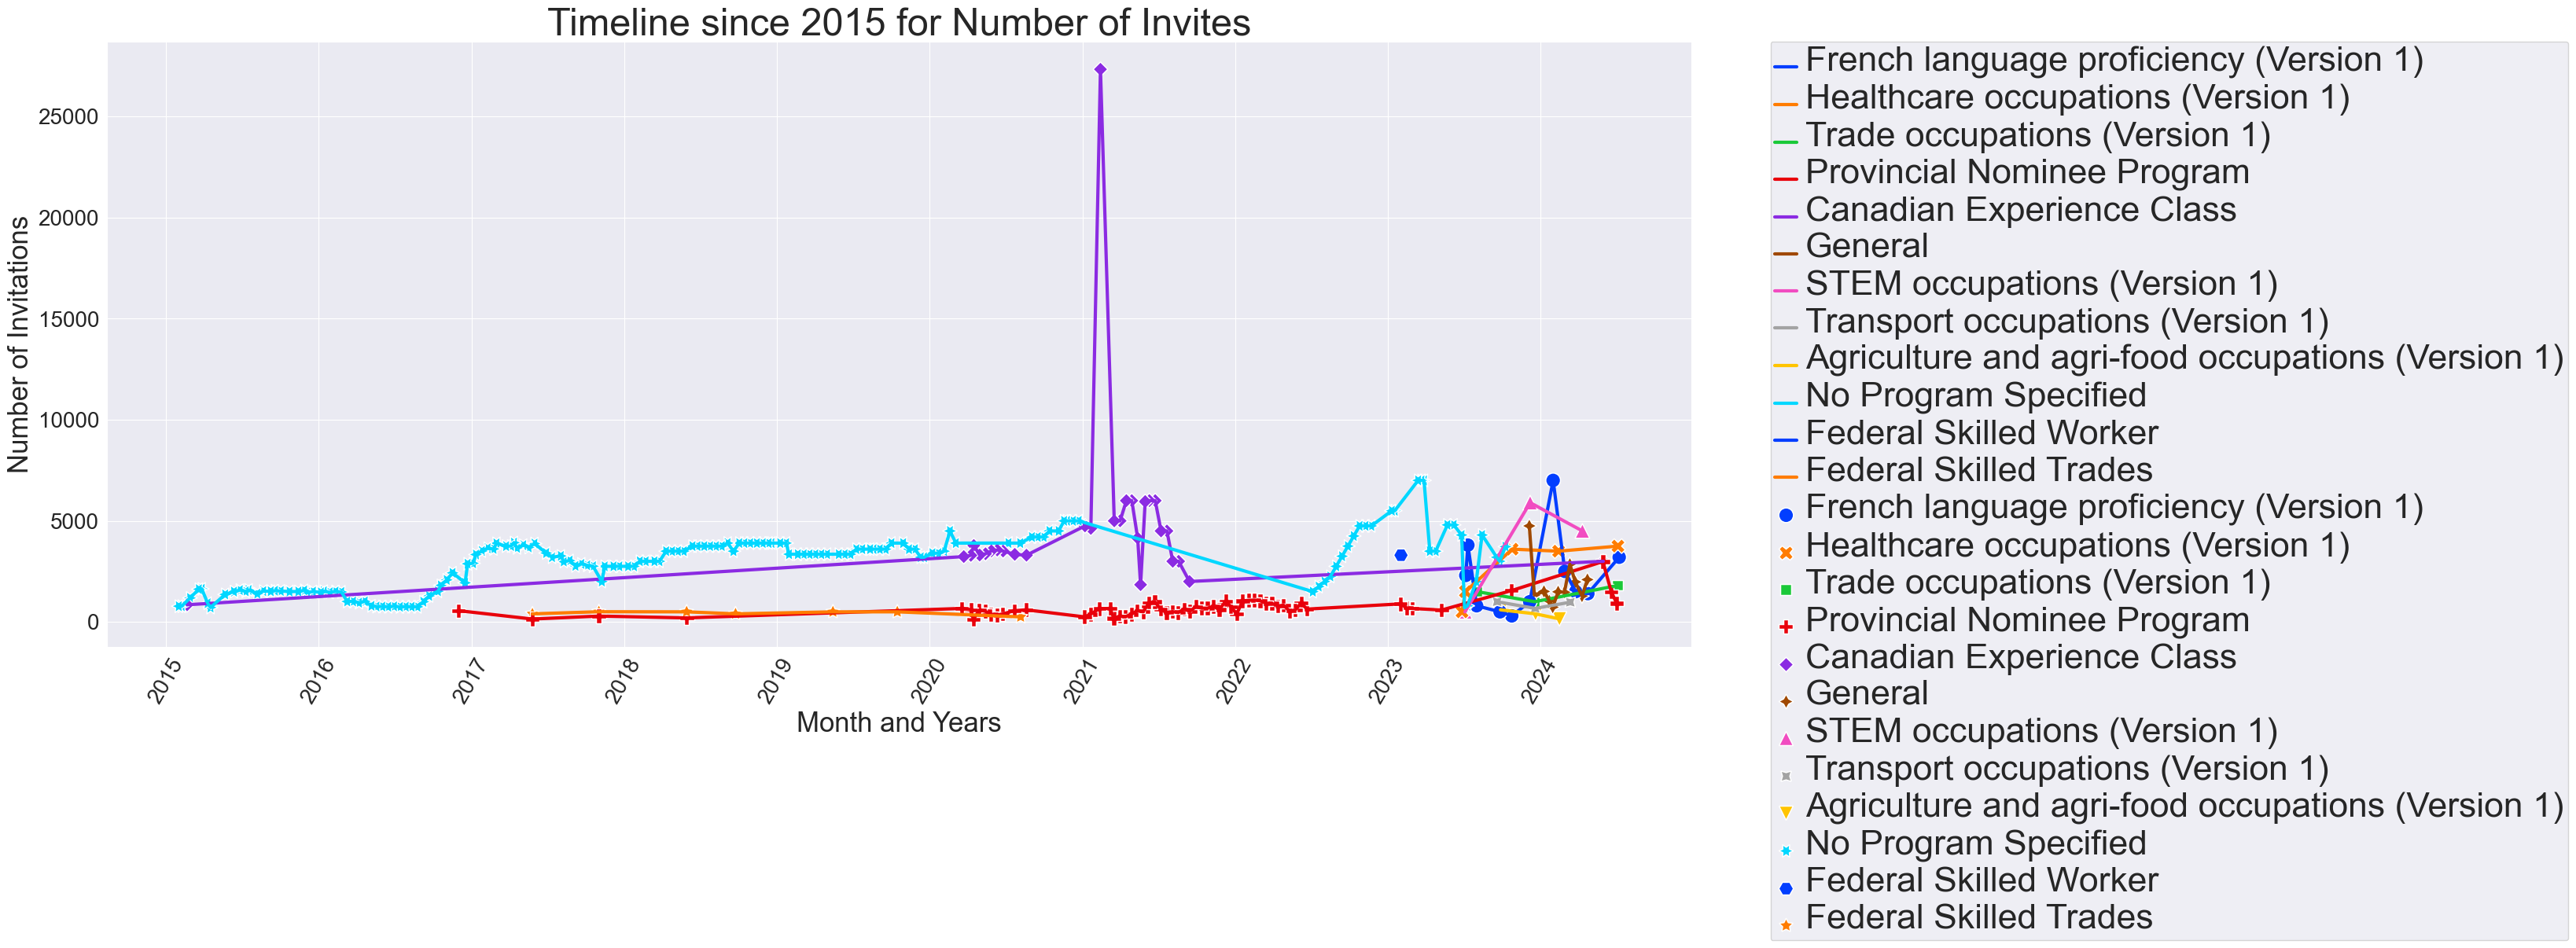

In [466]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='date', y= 'invitations issued', lw=3,data=df,hue='round type',palette="bright")
sns.scatterplot(x='date', y= 'invitations issued', data=df, hue='round type', s=180,style='round type',palette="bright")
g =plt.xticks(rotation=60)
s.set_xlabel('Month and Years', fontsize=25)
s.set_ylabel('Number of Invitations', fontsize=25)
s.set_title('Timeline since 2015 for Number of Invites', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

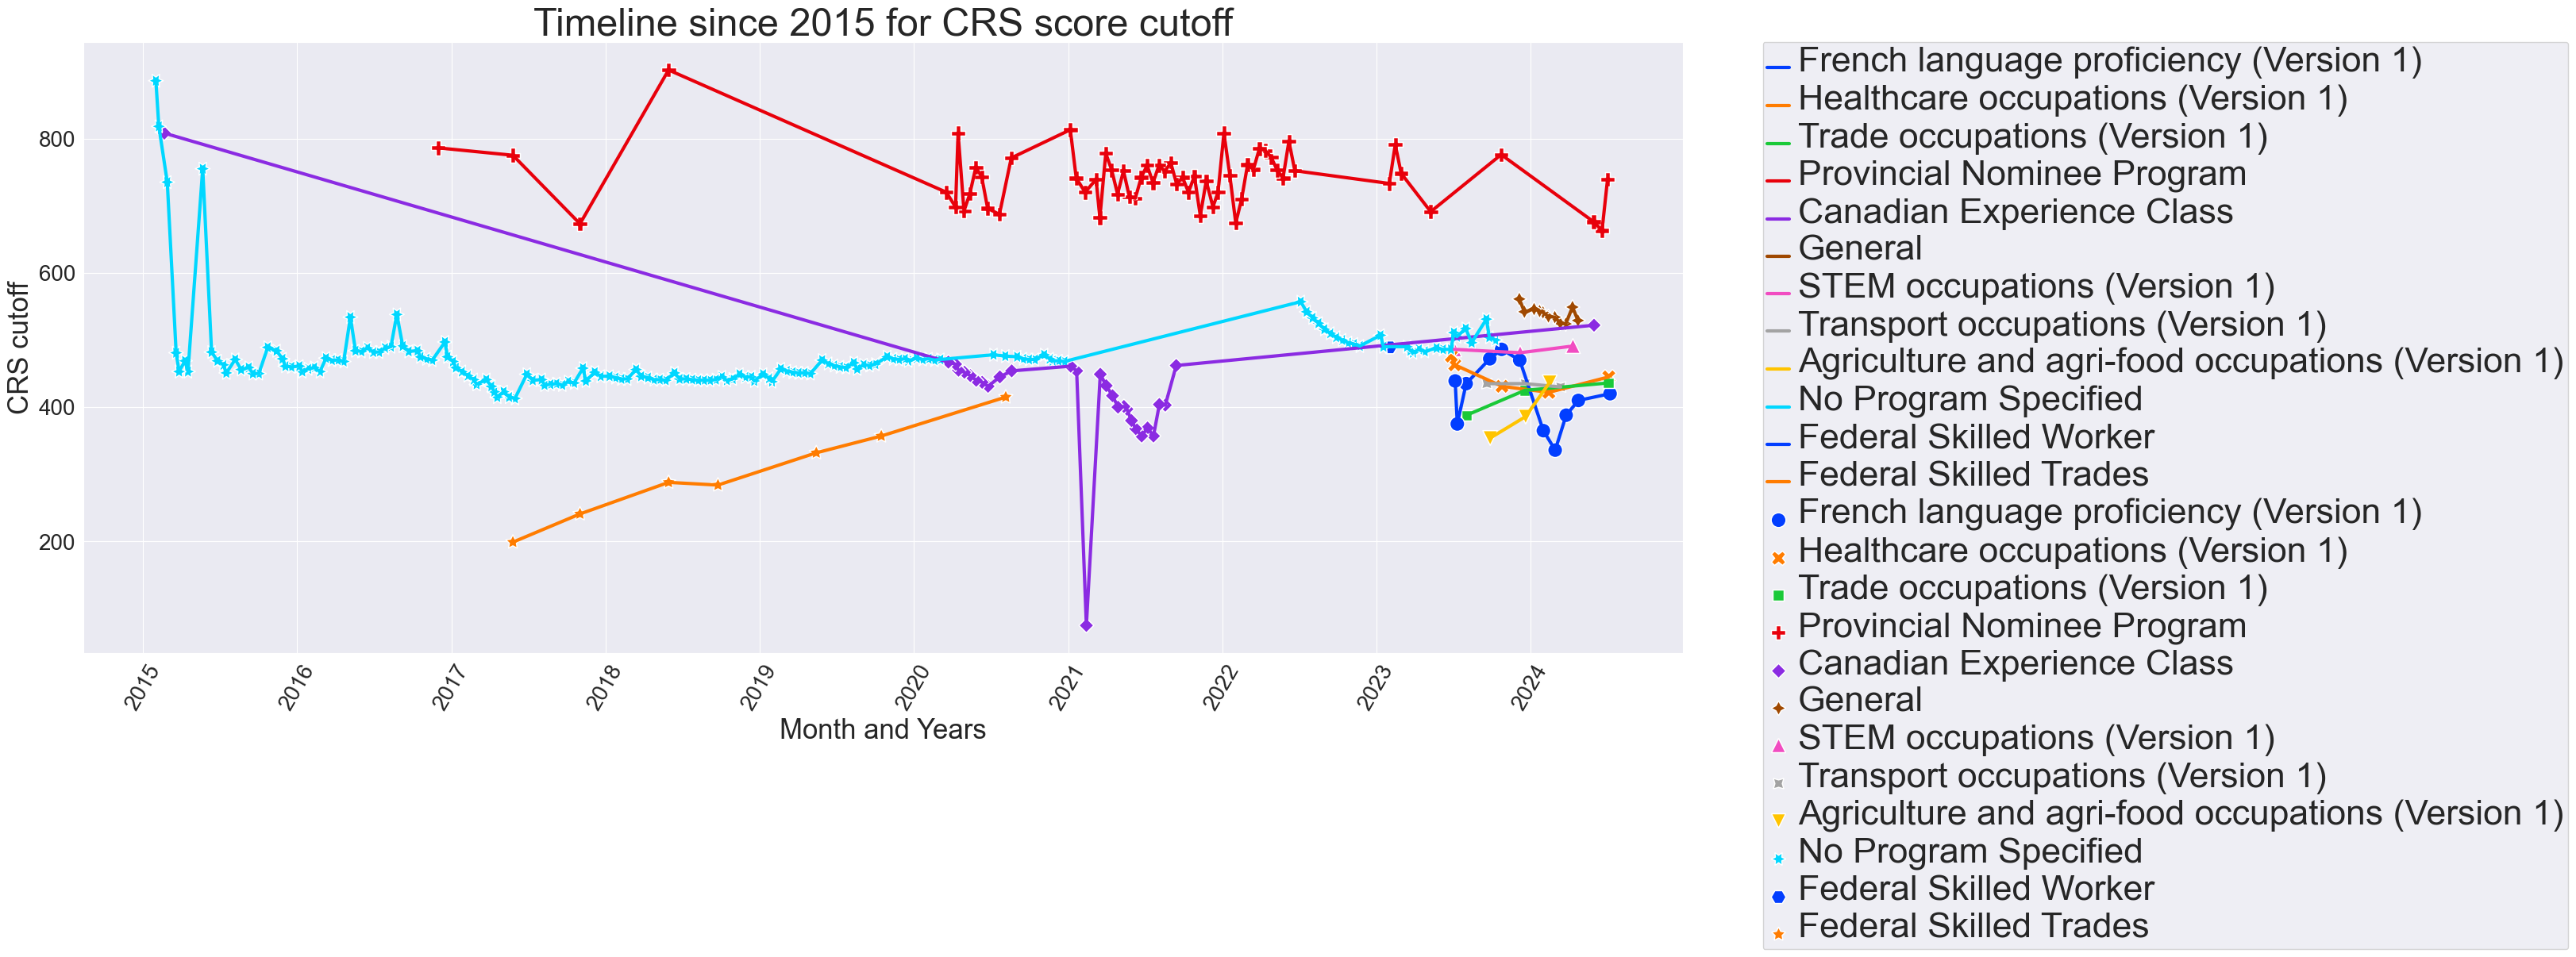

In [467]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='date', y= 'CRS cutoff', lw=3,data=df,hue='round type',palette="bright")
sns.scatterplot(x='date', y= 'CRS cutoff', data=df, hue='round type', s=180,style='round type',palette="bright")
g =plt.xticks(rotation=60)
s.set_xlabel('Month and Years', fontsize=25)
s.set_ylabel('CRS cutoff', fontsize=25)
s.set_title('Timeline since 2015 for CRS score cutoff', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

In [468]:
idx = df["round type"].isin(["No program specified","General"]) & (df["date"] > pd.to_datetime('2015-07-01'))
df_r = df[idx]

/var/folders/fm/8gkkcxbn0y3896pxrr1p0nqh0000gn/T/ipykernel_24081/2400447097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.barplot(x='Month', y='CRS cutoff', data=df_r, palette='magma')


(430.0, 500.0)

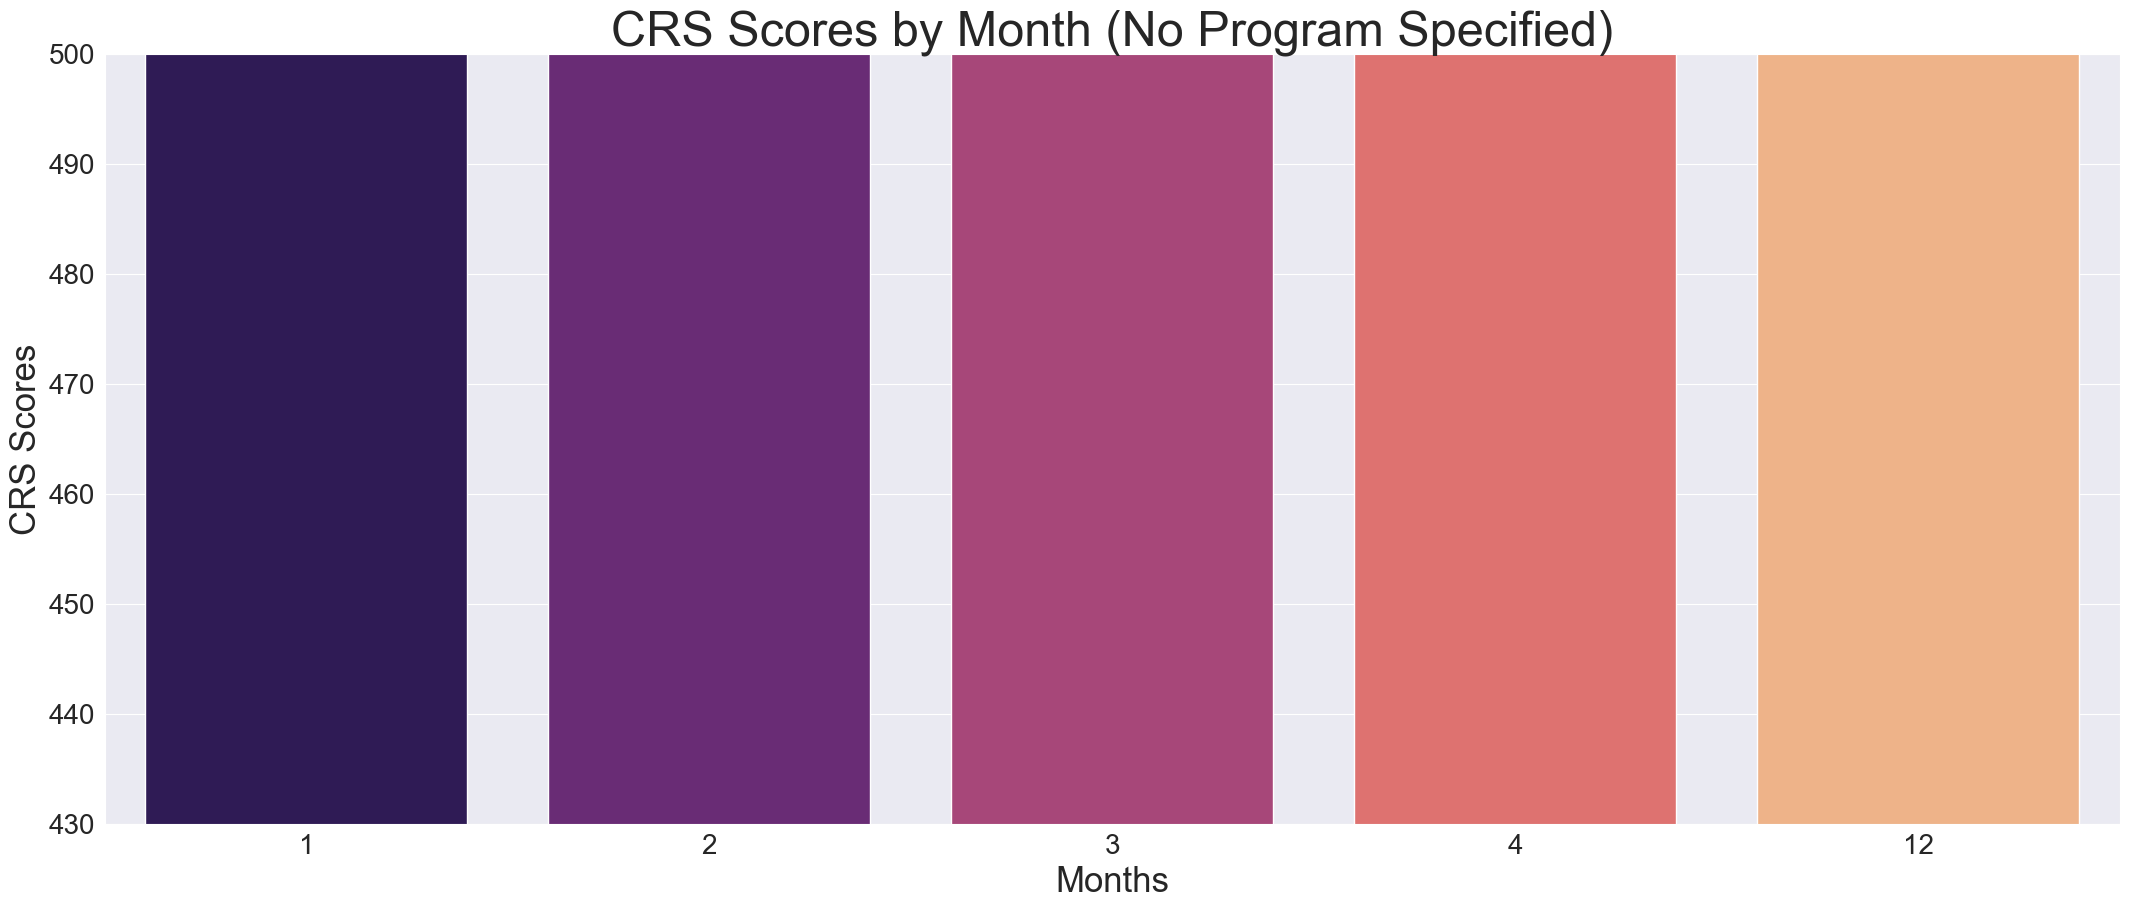

In [469]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='CRS cutoff', data=df_r, palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('CRS Scores', fontsize=25)
f.set_title('CRS Scores by Month (No Program Specified)', fontsize=35)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)
plt.ylim(430,500)


In [470]:
df[["date","CRS cutoff","invitations issued","total applications","round type"]].groupby('round type').describe(percentiles=[])

date  \
                                                  count   
round type                                                
Agriculture and agri-food occupations (Version 1)     3   
Canadian Experience Class                            29   
Federal Skilled Trades                                7   
Federal Skilled Worker                                1   
French language proficiency (Version 1)              11   
General                                              11   
Healthcare occupations (Version 1)                    5   
No Program Specified                                167   
Provincial Nominee Program                           60   
STEM occupations (Version 1)                          3   
Trade occupations (Version 1)                         3   
Transport occupations (Version 1)                     3   

                                                                                  \
                                                                            mean   
round type                                                                         
Agriculture and agri-food occupations (Version 1)            2023-12-12 00:00:00   
Canadian Experience Class                          2020-12-04 19:51:43.448275968   
Federal Skilled Trades                             2018-11-16 03:25:42.857142784   
Federal Skilled Worker                                       2023-02-02 00:00:00   
French language proficiency (Version 1)            2023-12-12 13:05:27.272727296   
General                                            2024-02-14 13:05:27.272727296   
Healthcare occupations (Version 1)                           2023-11-21 09:36:00   
No Program Specified                               2018-10-02 08:02:52.455089920   
Provincial Nominee Program                                   2021-07-10 04:24:00   
STEM occupations (Version 1)                                 2023-11-27 16:00:00   
Trade occupations (Version 1)                                2024-01-08 00:00:00   
Transport occupations (Version 1)                            2023-12-17 16:00:00   

                                                                        \
                                                                   min   
round type                                                               
Agriculture and agri-food occupations (Version 1)  2023-09-28 00:00:00   
Canadian Experience Class                          2015-02-20 00:00:00   
Federal Skilled Trades                             2017-05-26 00:00:00   
Federal Skilled Worker                             2023-02-02 00:00:00   
French language proficiency (Version 1)            2023-07-07 00:00:00   
General                                            2023-12-06 00:00:00   
Healthcare occupations (Version 1)                 2023-06-28 00:00:00   
No Program Specified                               2015-01-31 00:00:00   
Provincial Nominee Program                         2016-11-30 00:00:00   
STEM occupations (Version 1)                       2023-07-05 00:00:00   
Trade occupations (Version 1)                      2023-08-03 00:00:00   
Transport occupations (Version 1)                  2023-09-20 00:00:00   

                                                                        \
                                                                   50%   
round type                                                               
Agriculture and agri-food occupations (Version 1)  2023-12-21 00:00:00   
Canadian Experience Class                          2021-03-18 00:00:00   
Federal Skilled Trades                             2018-09-24 00:00:00   
Federal Skilled Worker                             2023-02-02 00:00:00   
French language proficiency (Version 1)            2023-12-07 00:00:00   
General                                            2024-02-13 00:00:00   
Healthcare occupations (Version 1)                 2023-10-26 00:00:00   
No Program Specified                               20

## Data analysis
### An intro to the inception of express entry
The government of Canada launched Express Entry in January of 2015 for certain economic immigration programs including the:

- Federal Skilled Worker Program (FSWP), 
- Federal Skilled Trades Program (FSTP), 
- Canadian Experience Class (CEC) and 
- a portion of the Provincial Nominee program (PNP).

Candidates with higher CRS scores have a higher likelihood of being invited. Potential candidates can be awarded 600 additional points for a job offer or a provincial/territorial nomination.

The candidate pool varies as people enter/leave it, and in general canada started offering 1,500 invitations per round.

When Express Entry launched, Canada stated that those who meet the criteria of one of the federal immigration programs managed by the Express Entry system (i.e. Federal Skilled Worker, Canadian Experience Class and Federal Skilled Trades Program) are accepted into a pool of candidates.  Provincial Nominees participating in Express Entry must also meet the criteria of one of these three federal immigration programs.

### 2015-2020: Understanding the early data
The data shows that at the beginning of the CRS initiative (circa 2015) only two types were present:
- No program specified. 
  - Actually is the total of all 4 programs combined according to [documents from 2015](https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/express-entry-year-end-report-2015.html)
- Canadian experience class 
  - Only one datapoint for February 20, 2015 is available because it was a Canadian Experience Class only invitation.

On the initial rounds, for 2015, we see a high cutoff CRS score. This is because:
>In the first several months of operation, IRCC planned for small and regular invitation rounds. This allowed for any necessary adjustments to the system, therefore ensuring program integrity and success.

Which in turn meant that:
>Almost all candidates invited in the first four invitation rounds had job offers supported by LMIAs. The vast majority of these candidates were working in Canada, were familiar with Canada’s immigration system and were able to submit a profile quickly. With 600 points available for a job offer, they became top-ranked candidates. 

Then around 2017 we see a couple more unique "class invite only" with their own CRS cutoff:
- Provincial nominee program
- Federal skilled trades

for which the Federal skilled trades program shows as an invite only up tp mid  2020.

### 2020-2022: Effects of covid
#### lowest CRS record/ highest number of invites
Interestingly enough, in February 13, 2021 the 'canadian experience class' category issued 27,332 invites, with a very low CRS score of 75.

Apparently, according to this [source](https://www.immigration.ca/express-entry-2021-first-quarter-review-unprecedented-3-months-sparked-by-february-mega-draw/#:~:text=On%20February%2013%2C%202021%20%E2%80%93%20a%20date,single%20draw%2C%20recording%20a%20minimum%20Comprehensive%20Ranking), Ottawa looked to put itself on track to welcome its target of 400,001 new immigrants that year, which meant accepting most applicants, 90% of which were already in Canada with a temporary status and therefore were not affected by the COVID restrictions at that time. In other words, to keep up with the immigration targets in spite of covid, they accepted a ton of people already in the country.

#### Only 2 categories invited in 2021
then in august of 2020 the 'federal skilled trades' type scored its last datapoint, with 2021 only showihg PNP and CEC eligible candidates. This is because during COVID they focused on candidates already inside Canada, therefore halting invitations to FSTP and FSWP types as per the [2021 annual report](https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/express-entry-year-end-report-2021.html/).

It is worth noting that thanks to COVID the rounds of invitations became program specific, meaning that no general rounds were held. And thanks to COVID, the FSTP and FSWP got significant delays because the applicants could not fly into canada.

#### general rounds resumed in 2022

The data shows that on the first half of 2022 only PNP were invited, and on the second half of 2022 general rounds (no program specified) were sent.
This is because general rounds resumed in June of 2022 as stated by the 2021 annual report, where they mention that:

> The Department paused EE ITAs to Federal High Skilled immigration programs beginning September 20, 2021, while continuing to issue ITAs to the PNP. This pause was temporary; ITAs to Federal High Skilled immigration programs resumed in July 2022 once the processing inventory had been reduced enough to create space for new intake.

Still as per the [2022 annual report](https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/express-entry-year-end-report-2022.html) still no invitations were sent to FSTP due to backlog.

### 2023-present: category-based selection
#### 6 new categories
As on the prior annual reports:

> On June 23, 2022, legislative amendments were made to the Immigration and Refugee Protection Act (IRPA) that authorize the Minister of IRCC to invite foreign nationals to apply for permanent residence through EE on a new basis – their eligibility to be members of a category that supports an identified economic goal. This new authority, referred to as “category-based selection” will increase flexibility to select candidates in the EE pool with the skills and attributes needed to respond to Canada’s evolving economic needs and Government priorities through a new invitation round type. 

Which explains why in June 20, 2023 we see the first ever category-based round for healthcare.

The 6 eligible categories are thus, as per [Express Entry](https://www.canada.ca/en/immigration-refugees-citizenship/services/immigrate-canada/express-entry/submit-profile/rounds-invitations/category-based-selection.html):
- French-language proficiency
- Healthcare occupations
- Science, Technology, Engineering and Math (STEM) occupations
- Trade occupations
- Transport occupations
- Agriculture and agri-food occupations

#### general rounds
We see on december 2023 a 'general' rounds category, which is basically just the 'no program specified' type where the 4 original cateogories may apply (FSTP, FSWP, CEC, PNP).

It is worth noting that still Canada did not extend any invites to the FSTP category on 2021 and onwards.




## Code cleanup and preprocessing
Based on the analysis of the data, we can safely assume the following:
- The beginning of 2015 as well as the spike in 2021 can be safely taken out as outliers since the former is due to the initialization of the CRS system, and the latter is due to Ottawa + covid restrictions.
- The "no program specified" and the "general" class can be combined into one. After all, both types are used when anyone applies regardless of immigration program.
- the Provincial nomination program-only invites can be evaluated either separately or by adjusting the mean, since every single one of those applicants had an extra 600 points due to their pnp nomination and therefore will always have a higher cutoff than usual.
- We could focus only on general (no program specific) rounds since:
  - We could just ignore the FSTP and the FSWP types since they have not had program-only invites since COVID. In fact the FSWP had a single invite in 2023 that aligned with the General invites CRS cutoff.
  - The new 6 categories from 2023 have had about 3-10 iterations each. This likely means that as its own category there may not be sufficient data to make a reasonable prediction by themselves.

In [471]:
df["round type"] = df["round type"].replace({'No Program Specified': 'General'})

In [472]:
df = df[(df["round type"] == "General") & ((df["CRS cutoff"] < 700) & (df["CRS cutoff"] > 100))]

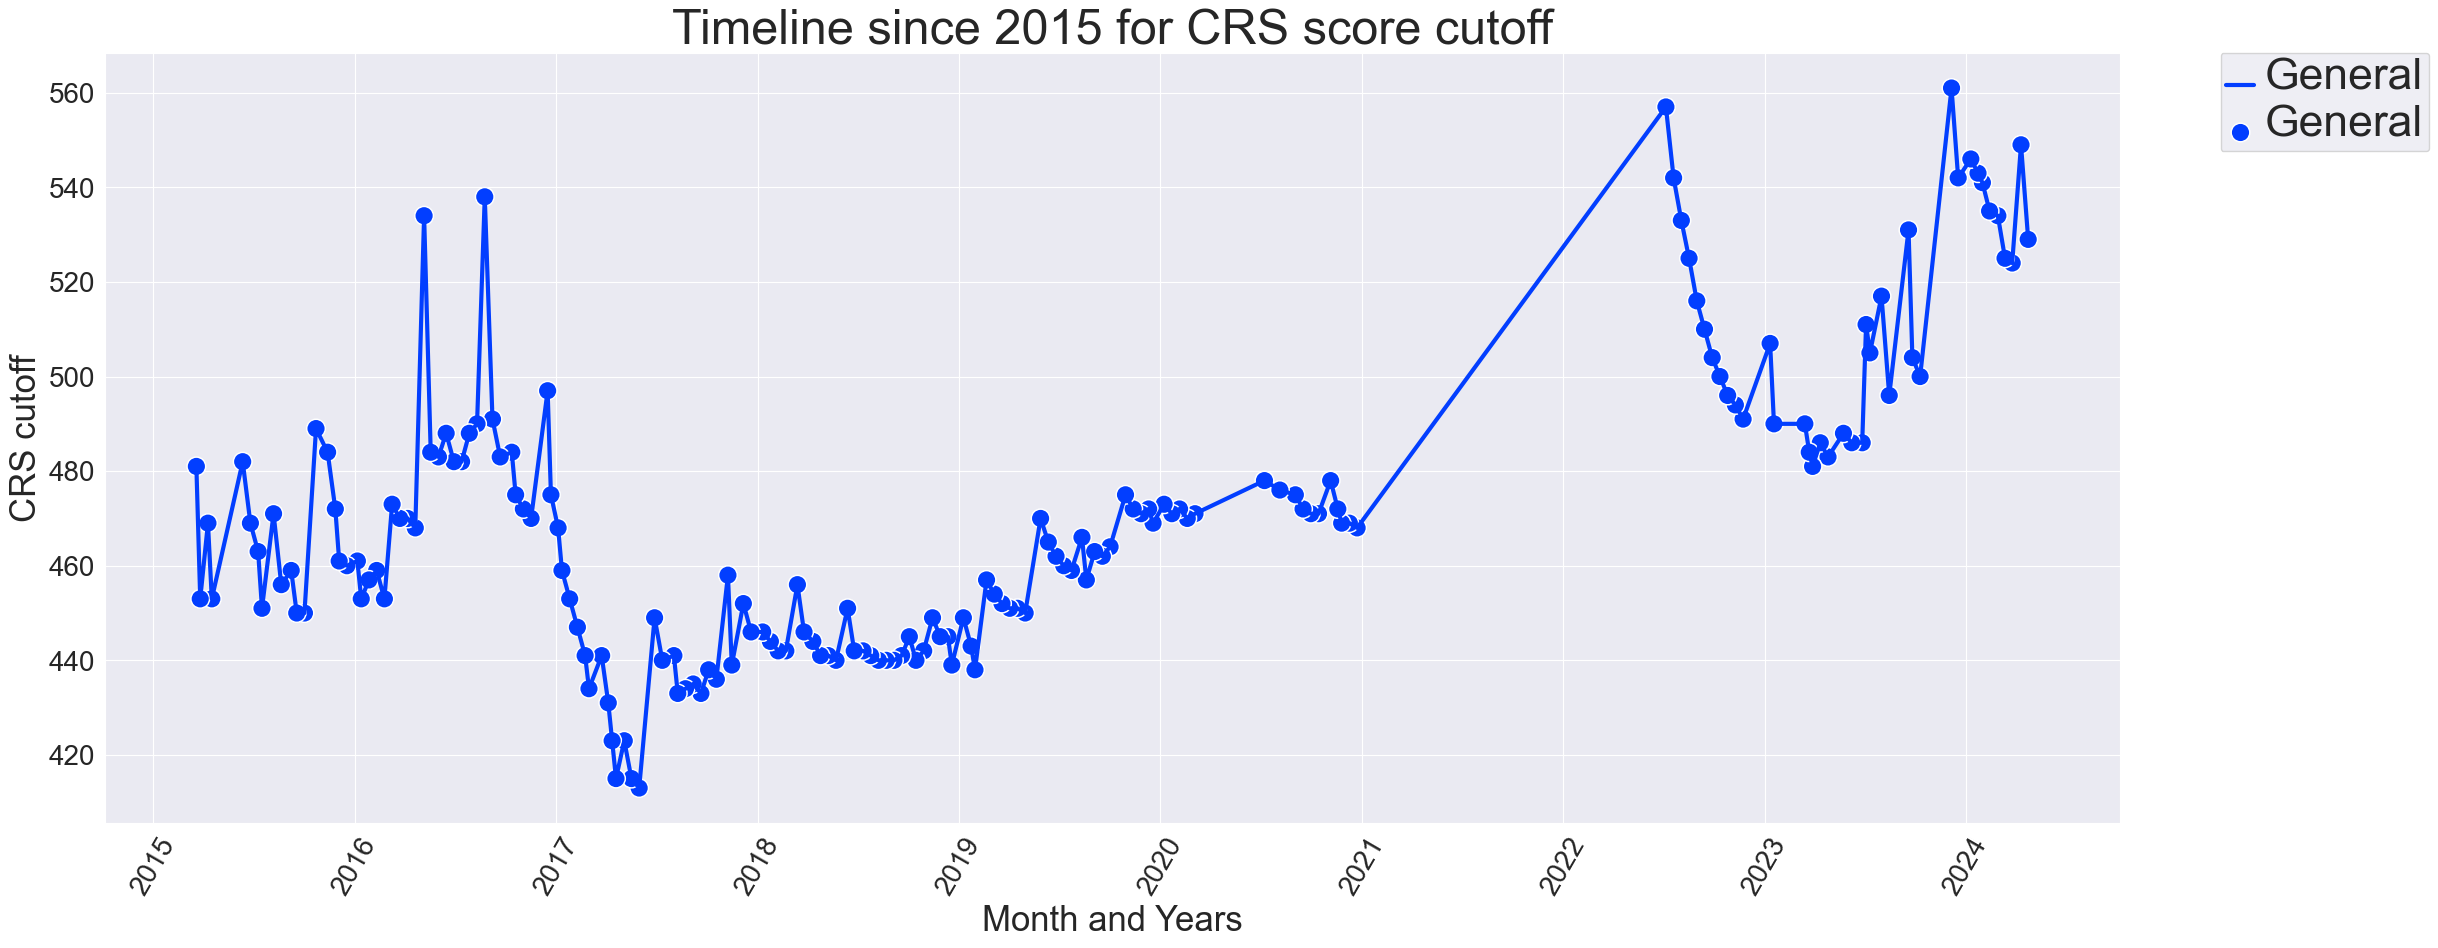

In [473]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
s = sns.lineplot(x='date', y= 'CRS cutoff', lw=3,data=df,hue='round type',palette="bright")
sns.scatterplot(x='date', y= 'CRS cutoff', data=df, hue='round type', s=180,style='round type',palette="bright")
g =plt.xticks(rotation=60)
s.set_xlabel('Month and Years', fontsize=25)
s.set_ylabel('CRS cutoff', fontsize=25)
s.set_title('Timeline since 2015 for CRS score cutoff', fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(s.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(s.get_legend().get_title(), fontsize='32') # for legend 
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)

/var/folders/fm/8gkkcxbn0y3896pxrr1p0nqh0000gn/T/ipykernel_24081/4055120878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.barplot(x='Month', y='CRS cutoff', data=df, palette='magma')


(430.0, 500.0)

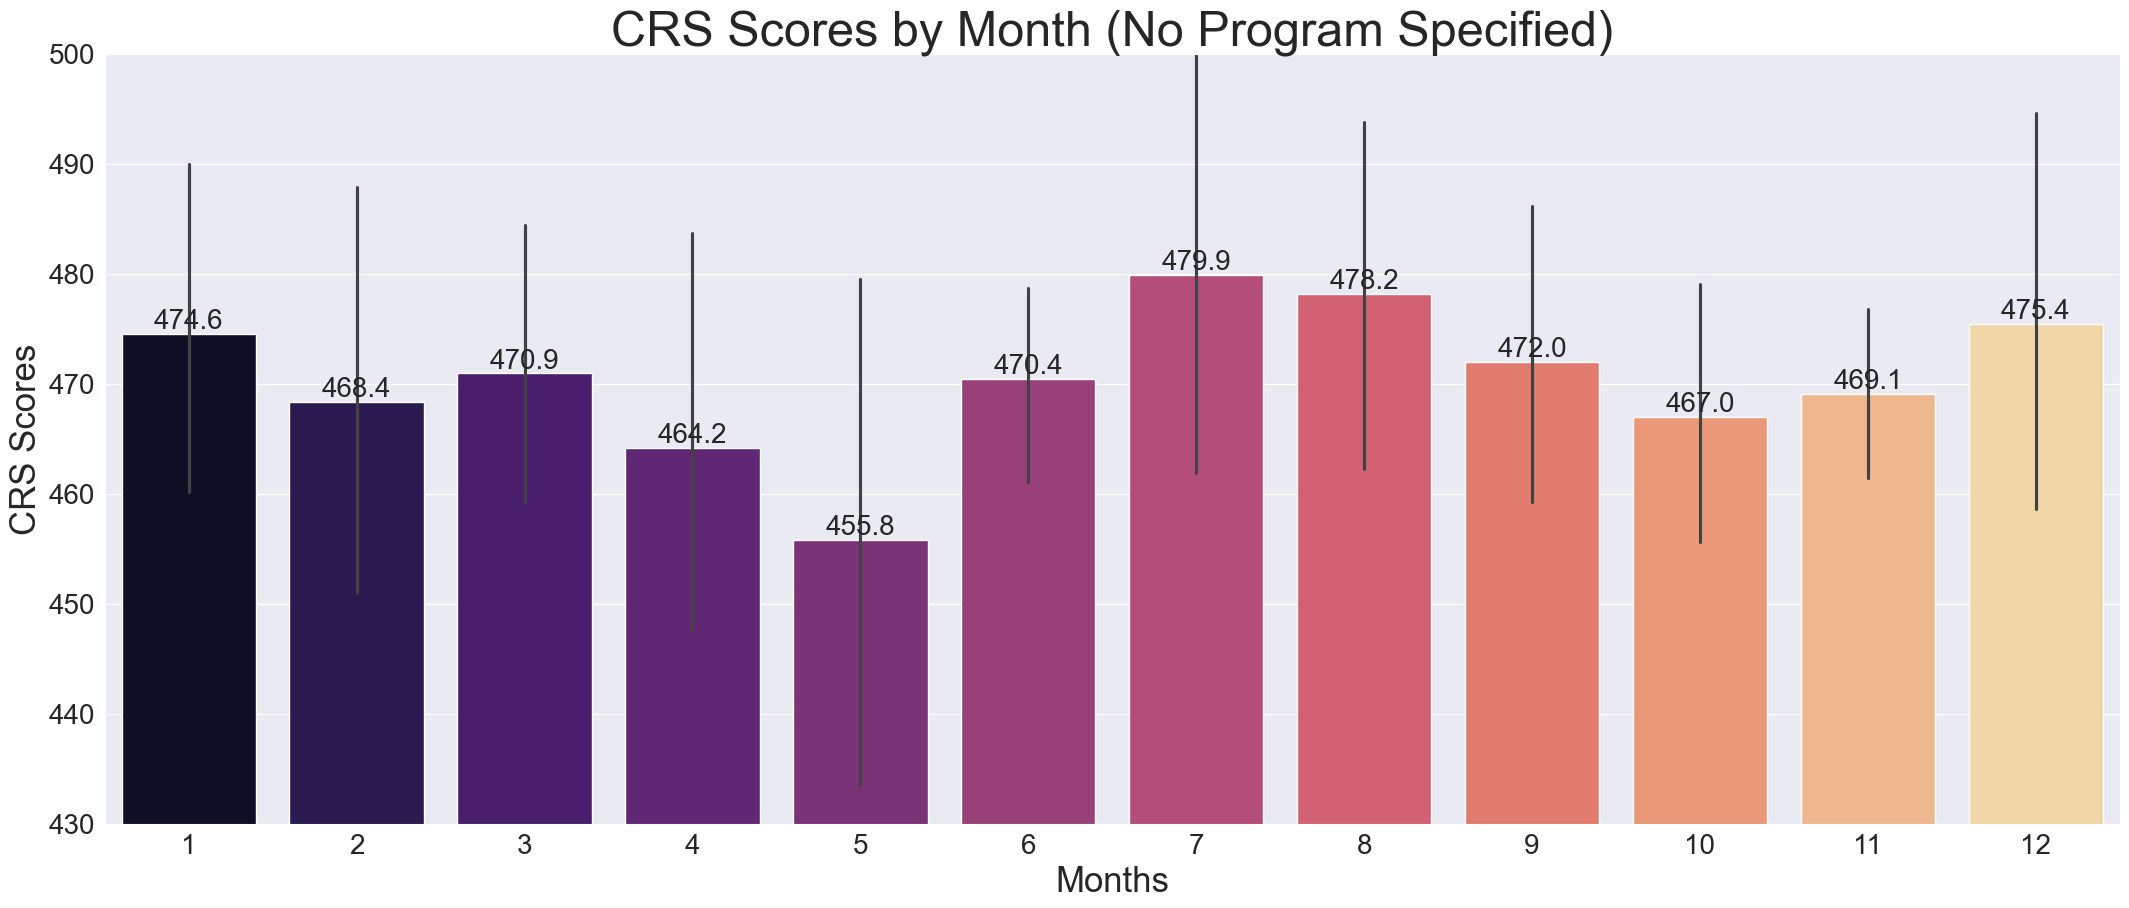

In [474]:
plt.figure(figsize=(26,10))
sns.set_style('darkgrid')
f = sns.barplot(x='Month', y='CRS cutoff', data=df, palette='magma')
for p in f.patches:
    f.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,9), size=20,
                   textcoords = 'offset points')
g =plt.xticks(rotation=0)
f.set_xlabel('Months', fontsize=25)
f.set_ylabel('CRS Scores', fontsize=25)
f.set_title('CRS Scores by Month (No Program Specified)', fontsize=35)
f = plt.xticks(fontsize=20)
f = plt.yticks(fontsize=20)
plt.ylim(430,500)

## Model fitting
Given the plots above, it seems that the general rounds:
- Are non-stationary data where the mean shifts over the years
- There is some seasonality month-by-month where the scores are lower during the first half of the year and they rise on the latter half.

Therefore, we can treat this data just like most people treat sales or stock time-series datasets. 

### Time-series ML fitting

For time series datasets, the usual ML methods available are, as per this [source](https://medium.com/@yennhi95zz/a-guide-to-time-series-models-in-machine-learning-usage-pros-and-cons-ac590a75e8b3):

- Autoregressive Integrated Moving Average (ARIMA)
  - model works well when the data has a clear trend, seasonality, and is stationary
- Seasonal Autoregressive Integrated Moving-Average (SARIMA) 
  - it uses the same approach as ARIMA but takes into account seasonal factors that can affect the data.
  - It can handle non-stationary data.
- Long Short-Term Memory (LSTM)
  - Can handle time series data with long-term dependencies. It can capture complex patterns in time series data.
  - It can handle non-stationary data.
  - Since it is deep learning it will be computationally expensive

For supervised models, what we can do is convert the time aspect of the problem into its own variable and fit the clasical models, as per this [source](https://neptune.ai/blog/select-model-for-time-series-prediction-task):
  - Linear regression
    - allows fitting linear relationships. It is very easy to use.
  - Random forest
    - allows fitting nonlinear relationships. It is still very easy to use.
  - XGBoost
    - just like the Random Forest but is still able to do parallel learning.

There also seem to be some brand new black-boxes courtesy of amason and meta:
- Prophet
  - automatically generate forecasting models without much knowledge or effort.
- DeepAR
  - it is relatively equal to Prophet

### Selecting ML models to try out
Given the type of data we have (non-stationary and seasonal with ~300 points and known 3 periods of data with different trends), we are going to focus on the following:
- SARIMA
- XGBoost
- LSTM



